# Load Libraries and Data

In [241]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression 

In [242]:
housing = fetch_california_housing()
data = housing["data"][:1000, :]
labels = housing["target"][:1000].reshape(-1, 1)

transformer = StandardScaler().fit(data)
data = transformer.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8)

In [243]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)

def show_loss_function(epochs, loss_func_values):
  plt.plot(epochs, loss_func_values)
  plt.xlabel("Number of epoch")
  plt.ylabel("Loss function value")
  plt.title("Loss function progress")
  None

# Basic Linear Regression implementation

In [244]:
from zlib import error

class MyLinearRegression:
  def __init__(self, lr=10e-8, n_iter=1, batch_size=1, thresh_to_stop=10e-3):
    self.lr = lr
    self.n_iter = n_iter
    self.batch_size = batch_size
    self.weights = None
    self.bias = None
    self.init_weights = False
    self.thresh_to_stop = thresh_to_stop

  def predict(self, X):
    if self.init_weights:
      return X.dot(self.weights) + self.bias
    raise error("Fit me!")

  def fit(self, X, y):
    self.weights = np.random.normal(size=(X.shape[1], 1))
    self.bias = np.random.random()
    self.init_weights = True
    loss_fn_values = []
    epochs = []
    for epoch in range(self.n_iter):
      np.random.seed(11)
      samples_indexes = [np.random.randint(0, y.size) for _ in range(self.batch_size)]
      X_batch, y_batch = X[samples_indexes, :], y[samples_indexes, :]

      diff = (self.predict(X_batch) - y_batch)
      grad = 2*X_batch.T.dot(diff)/y_batch.size
      self.weights -= self.lr * grad
      self.bias -= self.lr * diff.sum()/y_batch.size 

      loss_fn_values.append(loss_fn(self.predict(X_batch), y_batch))
      epochs.append(epoch + 1)
      try:
        if abs(loss_fn_values[-1] - loss_fn_values[-2]) < self.thresh_to_stop:
          break
      except:
        continue

    show_loss_function(epochs, loss_fn_values)

def loss_fn(y_true, y_pred):
  assert y_true.shape == y_pred.shape
  return ((y_true - y_pred)**2).sum() / y_true.size

In [255]:
model = MyLinearRegression(lr=10e-4, n_iter=10**4, batch_size=100, thresh_to_stop=10e-6)

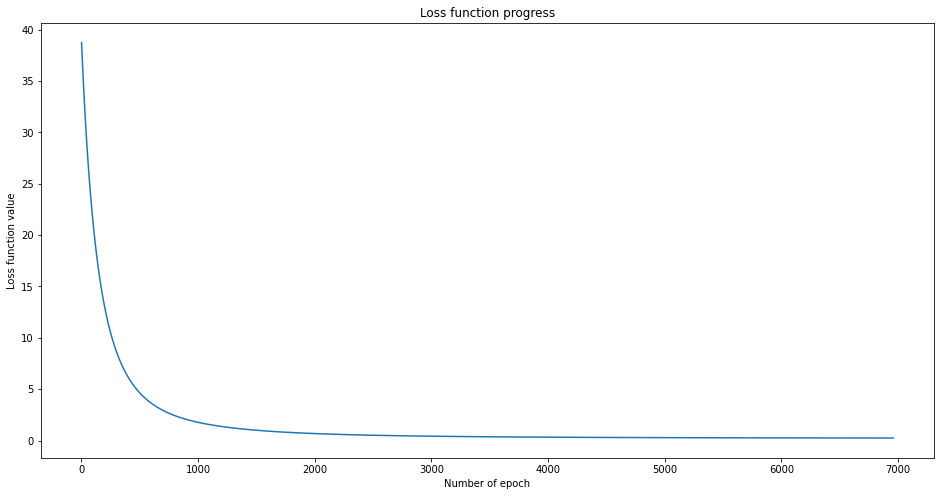

In [256]:
model.fit(X_train, y_train)

In [257]:
print(f"MSE with the train dataset: {loss_fn(model.predict(X_train), y_train)}")
print(f"MSE with the test dataset: {loss_fn(model.predict(X_test), y_test)}")

MSE with the train dataset: 0.47443892853442654
MSE with the test dataset: 0.37264534891815926


***Compare it with a classic algorithm from sklearn***

In [258]:
sklearn_regression = LinearRegression()
sklearn_regression.fit(X_train, y_train)

print(f"MSE with the train dataset for original model: {loss_fn(sklearn_regression.predict(X_train), y_train)}")
print(f"MSE with the test dataset for original model: {loss_fn(sklearn_regression.predict(X_test), y_test)}")

MSE with the train dataset for original model: 0.29088899662417167
MSE with the test dataset for original model: 0.26261300339652643


That's pretty worthy :)

# Let's make a Ridgre regression!

In [259]:
from zlib import error

class RidgeRegression:
  def __init__(self, lr=10e-8, n_iter=1, batch_size=1, thresh_to_stop=10e-3, alpha=0.1):
    self.lr = lr
    self.n_iter = n_iter
    self.batch_size = batch_size
    self.alpha = alpha
    self.weights = None
    self.bias = None
    self.init_weights = False
    self.thresh_to_stop = thresh_to_stop

  def predict(self, X):
    if self.init_weights:
      return X.dot(self.weights) + self.bias
    raise error("Fit me!")

  def fit(self, X, y):
    self.weights = np.random.normal(size=(X.shape[1], 1))
    self.bias = np.random.random()
    self.init_weights = True
    loss_fn_values = []
    epochs = []
    for epoch in range(self.n_iter):
      np.random.seed(11)
      samples_indexes = [np.random.randint(0, y.size) for _ in range(self.batch_size)]
      X_batch, y_batch = X[samples_indexes, :], y[samples_indexes, :]

      diff = (self.predict(X_batch) - y_batch)
      grad = 2*X_batch.T.dot(diff)/y_batch.size + 2*self.alpha*self.weights
      self.weights -= self.lr * grad
      self.bias -= self.lr * diff.sum()/y_batch.size 

      loss_fn_values.append(loss_fn(self.predict(X_batch), y_batch) + self.alpha*(self.weights**2).sum() / y_batch.size)
      epochs.append(epoch + 1)
      try:
        if abs(loss_fn_values[-1] - loss_fn_values[-2]) < self.thresh_to_stop:
          break
      except:
        continue

    show_loss_function(epochs, loss_fn_values)

def loss_fn(y_true, y_pred):
  assert y_true.shape == y_pred.shape
  return ((y_true - y_pred)**2).sum() / y_true.size

In [264]:
model = RidgeRegression(lr=10e-3, n_iter=10**4, batch_size=100, thresh_to_stop=10e-5, alpha=0.1)

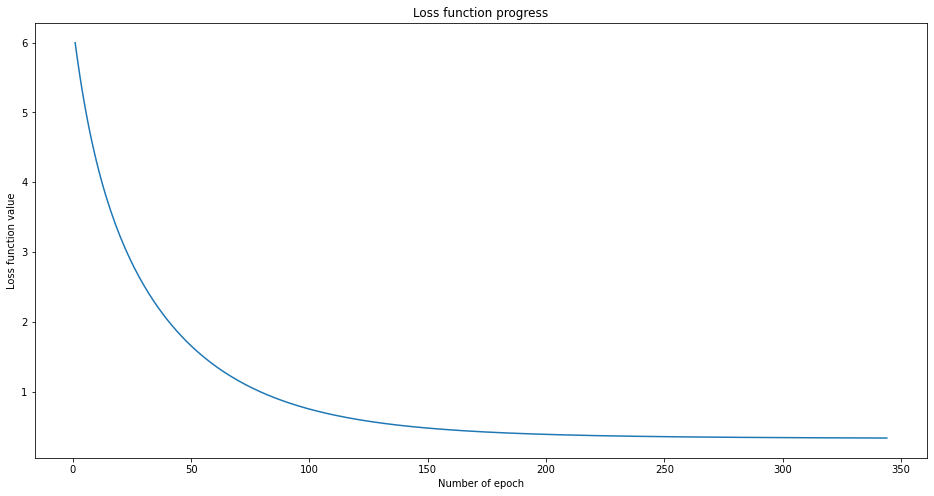

In [265]:
model.fit(data, labels)

In [266]:
print(f"MSE with the train dataset: {loss_fn(model.predict(X_train), y_train)}")
print(f"MSE with the test dataset: {loss_fn(model.predict(X_test), y_test)}")

MSE with the train dataset: 0.38083170438946967
MSE with the test dataset: 0.3799751734747001


***In comparison with the classical one:***

In [267]:
sklearn_ridge = Ridge(alpha=0.1)
sklearn_ridge.fit(X_train, y_train)
print(f"MSE with the train dataset: {loss_fn(sklearn_ridge.predict(X_train), y_train)}")
print(f"MSE with the test dataset: {loss_fn(sklearn_ridge.predict(X_test), y_test)}")

MSE with the train dataset: 0.2908890281742595
MSE with the test dataset: 0.2626074028533392


And again

P.S. I presume, that a little magic with hyperparameters may make my model's result even better in comparison with the original one, but I'm gonna take it easy now. I bet we will play with hyperparameters adjusting in the future

# Logistic Regression implementation

In [268]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data, labels = data["data"], data["target"]
transformer = StandardScaler()
data = transformer.fit_transform(data)
labels = labels.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8)

Use the most superficial activation function - Sigmoid

In [269]:
from zlib import error

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

class MyLogisticRegression:
  def __init__(self, lr=10e-8, n_iter=1, batch_size=1, thresh_to_stop=10e-3, alpha=0.1):
    self.lr = lr
    self.n_iter = n_iter
    self.batch_size = batch_size
    self.alpha = alpha
    self.weights = None
    self.bias = None
    self.init_weights = False
    self.thresh_to_stop = thresh_to_stop

  def predict(self, X):
    if self.init_weights:
      return np.apply_along_axis(sigmoid, 1, X.dot(self.weights) + self.bias)
    raise error("Fit me!")

  def fit(self, X, y):
    self.weights = np.random.normal(size=(X.shape[1], 1))
    self.bias = np.random.random()
    self.init_weights = True
    loss_fn_values = []
    epochs = []
    for epoch in range(self.n_iter):
      np.random.seed(11)
      samples_indexes = [np.random.randint(0, y.size) for _ in range(self.batch_size)]
      X_batch, y_batch = X[samples_indexes, :], y[samples_indexes, :]

      diff = (self.predict(X_batch) - y_batch)
      grad = X_batch.T.dot(diff) + 2*self.alpha*self.weights
      self.weights -= self.lr * grad
      self.bias -= self.lr * diff.sum()

      loss_fn_values.append(loss_fn(self.predict(X_batch), y_batch) + self.alpha*(self.weights**2).sum() / y_batch.size)
      epochs.append(epoch + 1)
      try:
        if abs(loss_fn_values[-1] - loss_fn_values[-2]) < self.thresh_to_stop:
          break
      except:
        continue

    show_loss_function(epochs, loss_fn_values)

def loss_fn(y_true, y_pred):
  assert y_true.shape == y_pred.shape
  y_true = y_true.reshape(-1)
  y_pred = y_pred.reshape(-1)
  n_samples = y_true.size
  eps = 10e-6
  logloss = 0
  for pred, true in zip(y_pred, y_true):
    logloss += -(true*np.log2(pred + eps) + (1 - true)*np.log2(1 - pred + eps))
  return logloss / n_samples

In [297]:
model = MyLogisticRegression(lr=10e-4, n_iter=10**4, batch_size=512, thresh_to_stop=10e-6, alpha=0.1)

Utterly stochastically

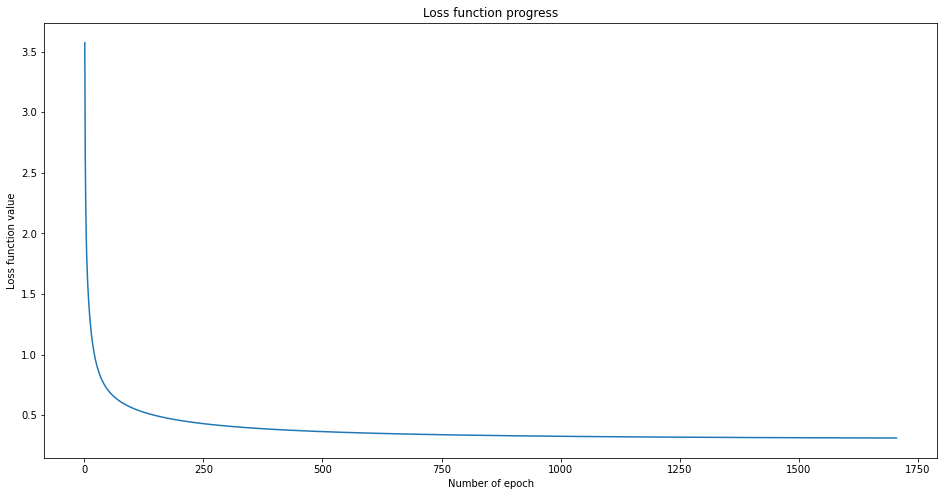

In [298]:
model.fit(X_train, y_train)

In [299]:
print(f"MSE with the train dataset: {loss_fn(model.predict(X_train), y_train)}")
print(f"MSE with the test dataset: {loss_fn(model.predict(X_test), y_test)}")

MSE with the train dataset: 0.4974725830449757
MSE with the test dataset: 0.5632931197337533


***Let's take a look at the original model:***

In [296]:
sklearn_logreg = LogisticRegression(penalty='l2', C=0.1)
sklearn_logreg.fit(X_train, y_train.ravel())

print(f"MSE with the train dataset: {loss_fn(sklearn_logreg.predict(X_train).reshape(-1, 1), y_train)}")
print(f"MSE with the test dataset: {loss_fn(sklearn_logreg.predict(X_test).reshape(-1, 1), y_test)}")

MSE with the train dataset: 0.29202346149649405
MSE with the test dataset: 0.2913830275307623


I didn't get, how to set random in numpy for numbers generation, so I made it kinda silly))

I also perhaps made a couple of mistakes with gradients computing, but these models work adequately, so I decided not to upgrade it further

# Thanks for your attention!

![Хомячок](https://www.meme-arsenal.com/memes/093158ff9bd8ed16cfa7ed7167c96ecb.jpg)
